# From the output in each excel files from ```common2interact_type.ipynb``` script , compute the correlations betwen the type of interaction and the common genes a pair gene shares.
- write a code to go per excel file in the folder of the ouput excel files which contain the data per gene to extract the correlation between the type of interaction and the normalize ratio of common interactors with the total number of interactors of the query gene
- convert the type of interaction column to numeric 
- also will be nice to quantify how many interactors genes have zero, one, two and three go-term in common with the query gene 

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import os, fnmatch
%matplotlib inline

In [2]:
files=os.listdir(path=r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\output-excel-files-postprocessed-data')

In [5]:
data_01=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\output-excel-files-postprocessed-data'+'\\'+ files[0])
data=data_01.drop(columns=['names of genes','% of query 2 subset  ','interact_annotation'])
data.fillna(0)
data.columns=['query-gene','interactors','comon-genes','#-of-commons','#-of-interactors-query','#-of-interactors-of-interactor-query','ratio','type-interaction']

In [3]:

all_data=[]



for each in files:
    
    data_each=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\output-excel-files-postprocessed-data'+'\\'+ each)
    data_each=data_each.rename(columns={'Unnamed: 0':'query-gene','Unnamed: 1':'interactors-genes','common':'who-is-common'})
    data_each=data_each.drop(columns=['names of genes','% of query 2 subset  ','interact_annotation'])
    if data_each.columns.any()=='GO_slim_interactors':
        data_each=data_each.drop(columns=['GO_slim_interactors'])
    if data_each.columns.any()=='GO_slim_query':
        data_each=data_each.drop(columns=['GO_slim_query'])

    data_each=data_each.fillna(0) 
    data_each.replace({'Negative': 2, 'Positive': 1,'Synthetic Lethality': 3,'not clear interaction':0}, inplace=True)
    all_data.append(data_each)

  


## Refining the dataframe of all the data 

In [4]:
data_pd=pd.concat(all_data,axis=0)
data_pd=data_pd.fillna(0)
data_pd=data_pd.drop(columns=['GO_slim_interactors','GO_slim_query'])

data_pd.index=np.arange(0,len(data_pd))

In [5]:
data_pd

,% of query subset,Type,interactors of query gene info length,interactors-genes,n_common,query gene info length,query-gene,who-is-common
0,0.000000,0,9,SLM3,0,1,15S_RRNA,[]
1,37.500000,1,96,TPS2,6,16,AAC1,"['THR4', 'TPS2', 'ADO1', 'SPE1', 'AAH1', 'LSC1']"
2,31.250000,1,129,THR4,5,16,0,"['TPS2', 'ILV1', 'ADO1', 'AAH1', 'MET7']"
3,25.000000,1,104,PPT2,4,16,0,"['CYS3', 'THR4', 'ADO1', 'LSC1']"
4,25.000000,3,86,PET9,4,16,0,"['CYS3', 'THR4', 'AAH1', 'PPT2']"
...,...,...,...,...,...,...,...,...
251718,22.222222,0,2,SHB17,2,9,0,"['SHB17', 'TAL1']"
251719,22.222222,0,10,NQM1,2,9,0,"['NQM1', 'ZWF1']"
251720,0.000000,1,0,0,0,9,0,[]
251721,0.000000,0,7,RSF2,0,9,0,[]


In [6]:
data_pd.to_excel('feature-matrix-data.xlsx')

In [2]:
data_pd=pd.read_excel('feature-matrix-data.xlsx',index_col='Unnamed: 0')

In [3]:
data_pd

,% of query subset,Type,interactors of query gene info length,interactors-genes,n_common,query gene info length,query-gene,who-is-common
0,0.000000,0,9,SLM3,0,1,15S_RRNA,[]
1,37.500000,1,96,TPS2,6,16,AAC1,"['THR4', 'TPS2', 'ADO1', 'SPE1', 'AAH1', 'LSC1']"
2,31.250000,1,129,THR4,5,16,0,"['TPS2', 'ILV1', 'ADO1', 'AAH1', 'MET7']"
3,25.000000,1,104,PPT2,4,16,0,"['CYS3', 'THR4', 'ADO1', 'LSC1']"
4,25.000000,3,86,PET9,4,16,0,"['CYS3', 'THR4', 'AAH1', 'PPT2']"
...,...,...,...,...,...,...,...,...
251718,22.222222,0,2,SHB17,2,9,0,"['SHB17', 'TAL1']"
251719,22.222222,0,10,NQM1,2,9,0,"['NQM1', 'ZWF1']"
251720,0.000000,1,0,0,0,9,0,[]
251721,0.000000,0,7,RSF2,0,9,0,[]


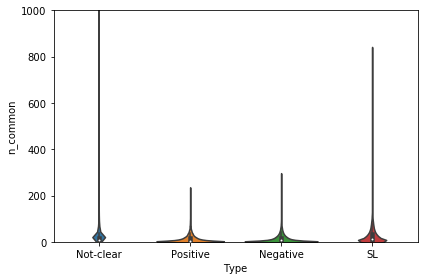

In [5]:
sns.violinplot(x="Type", y="n_common", data=data_pd),
plt.xticks(np.arange(0,4),['Not-clear','Positive','Negative','SL']);
plt.ylim([0,1000])
plt.tight_layout()
plt.savefig('n-common-vs-type-of-interaction.png',dpi=300,format='png',transparent=True)

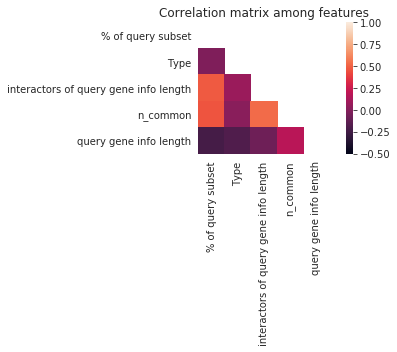

In [6]:
corr = data_pd.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-0.5 ,square=True)
ax.set_title('Correlation matrix among features')
plt.tight_layout()
plt.savefig('corr-matrix-heatmap-among-features.png',dpi=300,transparent=True,format='png')

In [4]:
data_train=np.array(data_pd['n_common'])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_train.reshape(-1, 1), data_pd.Type, test_size=0.2, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

In [49]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

1


In [14]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
from sklearn import metrics
predict_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

0.3898897606515046


## Linear SVM

In [50]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf_linear = LinearSVC(random_state=0, tol=1e-5,dual=True)


In [51]:
model=clf_linear.fit(x_train, y_train)

In [52]:
y_pred_svc=model.predict(x_test)

len(y_pred_svc[y_pred_svc==y_test]),len(y_pred_svc)

(24730, 50345)

Text(0.5, 257.44, 'Predicted label')

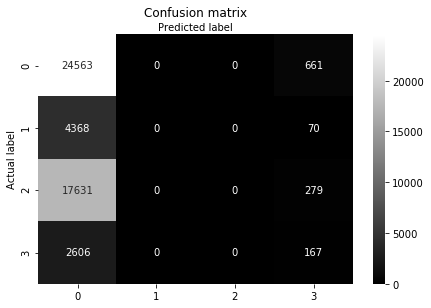

In [53]:
class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

cm = confusion_matrix(y_test, y_pred_svc)
# cm=np.delete(cm, np.s_[1:3], axis=1)  
# cm=np.delete(cm, np.s_[2:4], axis=0) 
class_names=['SL', 'nSL']

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy Score:',round(accuracy_score(y_test, y_pred_svc),2))

Accuracy Score: 0.49


In [42]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [43]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_classes=10, random_state=0, 
                           shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(x_test))
print(sk_report)

precision    recall  f1-score   support

           0   0.499573  0.973795  0.660367     25224
           1   0.000000  0.000000  0.000000      4438
           2   0.000000  0.000000  0.000000     17910
           3   0.141886  0.060224  0.084557      2773

    accuracy                       0.491211     50345
   macro avg   0.160365  0.258505  0.186231     50345
weighted avg   0.258113  0.491211  0.335516     50345

